In [1]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load) 
mouse_drug_df
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_df

# Combine the data into a single dataset
merged_trial_df = clinical_trial_df.merge(mouse_drug_df, on = 'Mouse ID', how='left')


# Display the data table for preview
merged_trial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 



merged_trial_grouped = merged_trial_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
merged_trial_grouped.head()

avg_tumor_df = merged_trial_grouped.mean()
# Convert to DataFrame
avg_tumor_df = pd.DataFrame(avg_tumor_df)
avg_tumor_df = avg_tumor_df.reset_index()
# Preview DataFrame
avg_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_error = merged_trial_grouped.sem()

# Convert to DataFrame
tumor_standard_error_df = pd.DataFrame(tumor_standard_error)
tumor_standard_error_df = tumor_standard_error_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview DataFrame

tumor_standard_error_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#print(avg_tumor_df['Timepoint'])
avg_tumor_df = avg_tumor_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
avg_tumor_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


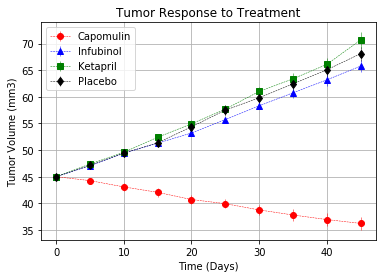

In [5]:
#Create list of options to pass to plt for charts

drugs_and_table_config= [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]

# Generate the Plot (with Error Bars)

for drug,marker,colors in drugs_and_table_config:
    standard_error = tumor_standard_error_df[drug]
    tumor_treatment_plt = plt.errorbar(avg_tumor_df.index,avg_tumor_df[drug],standard_error,
                                      fmt=marker,ls='--',color=colors,linewidth=0.5)
#Set figure options
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Save the Figure
plt.savefig("tumor_response_to_treatment.png")


In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_met_grouped = merged_trial_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
avg_met_df = mean_met_grouped.mean()


# Convert to DataFrame
avg_met_df = pd.DataFrame(avg_met_df)
avg_met_df = avg_met_df.reset_index()

# Preview DataFrame
avg_met_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_standard_error = mean_met_grouped.sem()

# Convert to DataFrame
met_standard_error_df = pd.DataFrame(met_standard_error)
met_standard_error_df= met_standard_error_df.reset_index()

# Preview DataFrame
met_standard_error_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
avg_met_df = avg_met_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
met_standard_error_df = met_standard_error_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
avg_met_df 
met_standard_error_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


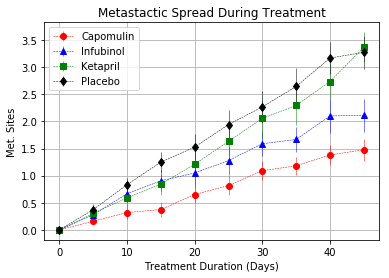

In [10]:
# Generate the Plot (with Error Bars)

#draw figure
for drug,marker,colors in drugs_and_table_config:
    standard_error = met_standard_error_df[drug]
    met_treatment_plt = plt.errorbar(avg_met_df.index,avg_met_df[drug],standard_error,
                                      fmt=marker,ls='--',color=colors,linewidth=0.5)
#Set figure options
plt.legend(loc='best')
plt.title('Metastactic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()
# Save the Figure
plt.savefig("Metastic Spread During Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse_grouped_df = merged_trial_df.groupby(['Drug','Timepoint'])['Mouse ID']
mouse_count_df = count_mouse_grouped_df.nunique()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count_df)
mouse_count_df = mouse_count_df.reset_index()
mouse_count_df = mouse_count_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df = mouse_count_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
#Preview the data frame
mouse_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


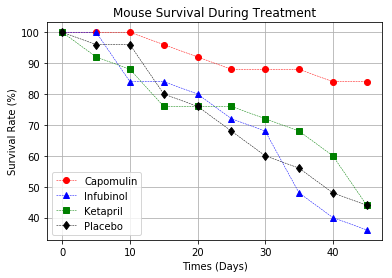

In [13]:
# Generate the Plot (Accounting for percentages)

for drug,marker,colors in drugs_and_table_config:
    mouse_count = mouse_count_df[drug][0]
    survival_rate = (mouse_count_df[drug]/mouse_count)*100
    survival_treatment_plt = plt.plot(mouse_count_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Mouse Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig("Mouse Survival During Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

drug_percent_change = (avg_tumor_df.iloc[-1]/(avg_tumor_df.iloc[0])-1)*100


# Display the data to confirm
drug_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

(-19.47530266789417, 46.12347172785185, 57.02879468660606, 51.29796048315151)


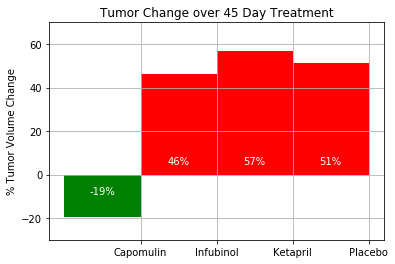

In [15]:
# Store all Relevant Percent Changes into a Tuple
drug_change_tuple = (drug_percent_change["Capomulin"], 
                drug_percent_change["Infubinol"], 
                drug_percent_change["Ketapril"], 
                drug_percent_change["Placebo"])
print(drug_change_tuple)

# Splice the data between passing and failing drugs

passing = drug_percent_change < 0

# Orient widths. Add labels, tick marks, etc. 

drug_config = ['Capomulin','Infubinol','Ketapril','Placebo']
percentage_list = [(drug_percent_change[drug])for drug in drug_config]
tumor_change_plt = plt.bar(drug_config,percentage_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def labelpercentages(rects, xpos='center'):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 4
        else:
            label_position = -10
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
labelpercentages(tumor_change_plt)

# Save the Figure
plt.savefig("Tumor Change over 45 Days Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)